<a href="https://colab.research.google.com/github/Devanshi-123/stock_market_prediction/blob/main/Stock_Market_Prediction(Metallic).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  **Stock Market Prediction Using Different Machine Learning And Deep Learning Algorithms**


## **Importing the necessary libraries**

In [129]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [130]:
cd /content/drive/My Drive/Stock Market Prediction(Mini Project)

/content/drive/My Drive/Stock Market Prediction(Mini Project)


## **Importing the dataset**

In [131]:
##Metallic Dataset
df=pd.read_csv("Stock_ALIR1.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1535 entries, 0 to 1534
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    1535 non-null   int64  
 1   <TICKER>      1535 non-null   object 
 2   <DTYYYYMMDD>  1535 non-null   int64  
 3   <FIRST>       1535 non-null   float64
 4   <HIGH>        1535 non-null   float64
 5   <LOW>         1535 non-null   float64
 6   <CLOSE>       1535 non-null   float64
 7   <VALUE>       1535 non-null   int64  
 8   <VOL>         1535 non-null   int64  
 9   <OPENINT>     1535 non-null   int64  
 10  <PER>         1535 non-null   object 
 11  <OPEN>        1535 non-null   float64
 12  <LAST>        1535 non-null   float64
dtypes: float64(6), int64(5), object(2)
memory usage: 156.0+ KB


## **Exploratory Data Analysis**

In [132]:
df.describe()

,Unnamed: 0,<DTYYYYMMDD>,<FIRST>,<HIGH>,<LOW>,<CLOSE>,<VALUE>,<VOL>,<OPENINT>,<OPEN>,<LAST>
count,1535.000000,1.535000e+03,1535.000000,1535.000000,1535.000000,1535.000000,1.535000e+03,1.535000e+03,1535.000000,1535.000000,1535.000000
mean,767.000000,2.014569e+07,7486.581759,7582.163518,7360.582410,7482.254072,1.932278e+10,4.098205e+06,502.579153,7455.385668,7469.728339
std,443.260646,4.159811e+04,4607.126002,4651.190635,4556.411491,4614.527475,4.988563e+10,1.054633e+07,740.133437,4586.153272,4608.472271
min,0.000000,2.002122e+07,818.000000,842.000000,818.000000,855.000000,9.227000e+03,1.000000e+00,1.000000,330.000000,842.000000
25%,383.500000,2.012071e+07,4080.000000,4149.000000,3993.000000,4061.000000,9.286925e+08,1.187995e+05,41.000000,4056.000000,4072.500000
50%,767.000000,2.015041e+07,6751.000000,6821.000000,6631.000000,6711.000000,4.514713e+09,8.766660e+05,202.000000,6709.000000,6710.000000
75%,1150.500000,2.018101e+07,11000.000000,11261.000000,10788.500000,11096.000000,1.756796e+10,4.207862e+06,674.500000,11071.500000,11097.500000
max,1534.000000,2.020060e+07,25800.000000,25800.000000,25291.000000,25291.000000,9.482221e+11,1.641960e+08,5703.000000,25291.000000,25291.000000


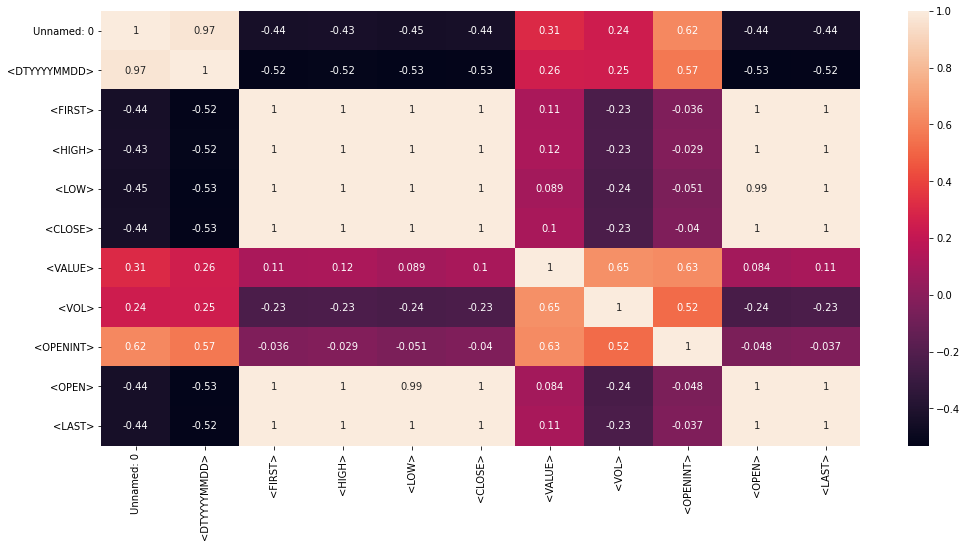

In [133]:
import seaborn as sns
plt.figure(1 , figsize = (17 , 8))
cor = sns.heatmap(df.corr(), annot = True)

In [134]:
df['datetime'] = pd.to_datetime(df['<DTYYYYMMDD>'], format='%Y%m%d')
df.index = df['datetime']
df.dropna()
df_new = df[["<FIRST>","<HIGH>","<LOW>","<CLOSE>","<VALUE>","<VOL>"]]
df_new.head()

,<FIRST>,<HIGH>,<LOW>,<CLOSE>,<VALUE>,<VOL>
datetime,,,,,,
2002-12-21,1700.0,1700.0,1700.0,1700.0,1700000,1000
2003-03-18,5600.0,5600.0,5600.0,5600.0,919497420800,164195968
2003-03-31,5320.0,5320.0,5320.0,5320.0,5320000,1000
2003-04-21,5054.0,5054.0,5054.0,5054.0,4472790,885
2004-01-06,1101.0,1101.0,1101.0,1101.0,974385,885


In [135]:
df_new.shape

(1535, 6)

In [136]:
#Calculating the change in price
df_new['change_in_price'] = df_new['<CLOSE>'].diff()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


## **Data Visualisation**

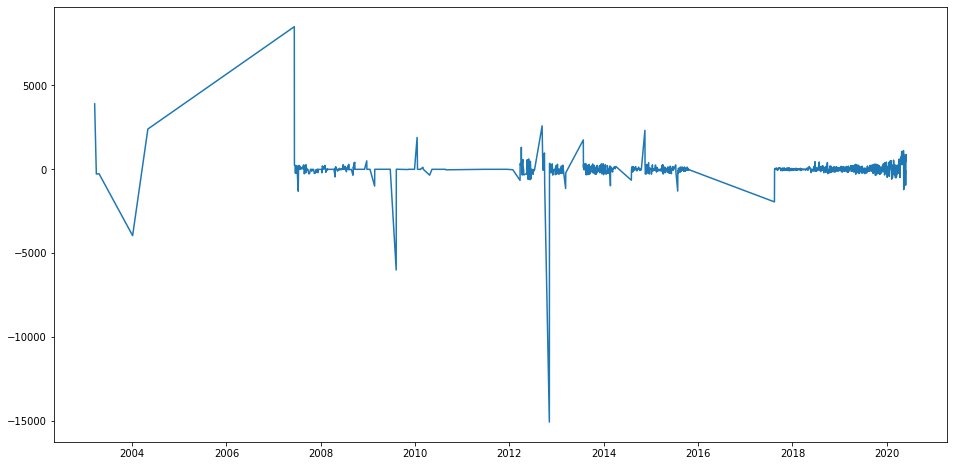

In [137]:
plt.figure(figsize=(16,8))
plt.plot(df_new['change_in_price'], label='Change In Price')

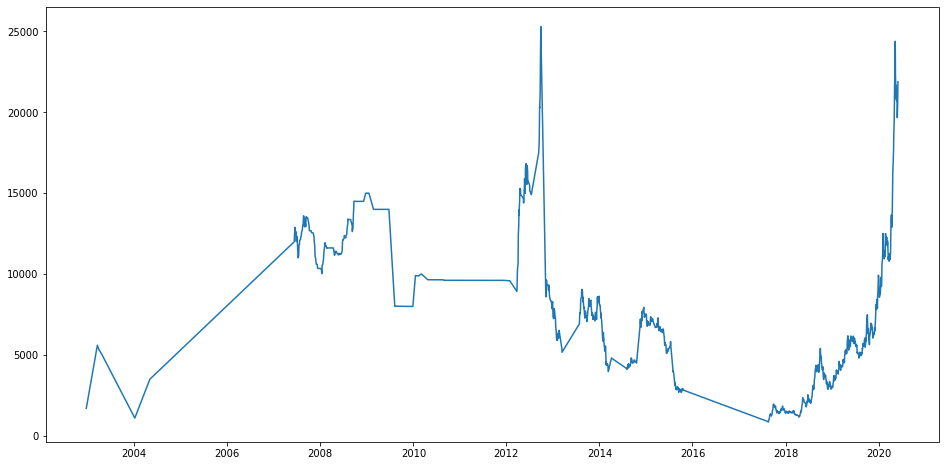

In [138]:
plt.figure(figsize=(16,8))
plt.plot(df_new['<CLOSE>'], label='Close Price history')

## **Calculating the technical indicators**

In [139]:
#1. Simple n day moving average
#A moving average (MA) is a widely used technical indicator that smooths out price trends by filtering out the “noise” from random short-term price fluctuations.
##The most common applications of moving averages are to identify trend direction and to determine support and resistance levels.
def moving_average(df, n):
    """Calculate the moving average for the given data.
    :param df: pandas.DataFrame
    :param n:
    :return: pandas.DataFrame
    """
    MA = pd.Series(df['<CLOSE>'].rolling(n, min_periods=n).mean(), name='MA_' + str(n))
    df = df.join(MA)
    return df
df_new = moving_average(df_new,10)
df_new.tail()

,<FIRST>,<HIGH>,<LOW>,<CLOSE>,<VALUE>,<VOL>,change_in_price,MA_10
datetime,,,,,,,,
2020-05-26,19641.0,19780.0,19641.0,20610.0,3734971842,190162,-64.0,21721.6
2020-05-27,19563.0,20458.0,19563.0,19664.0,88787842465,4515291,-946.0,21249.2
2020-05-30,19670.0,20647.0,19670.0,20548.0,61764520298,3005837,884.0,20986.5
2020-05-31,21200.0,21575.0,20954.0,21415.0,142517849008,6654898,867.0,20902.5
2020-06-01,22485.0,22485.0,22485.0,21891.0,25459832955,1132303,476.0,20977.3


In [140]:
#2. Weighted Moving Average (WMA)
def weighted_moving_average(df, n):
    """
    :param df: pandas.DataFrame
    :param n:
    :return: pandas.DataFrame
    """
    WMA = pd.Series(df['<CLOSE>'].ewm(span=n, min_periods=n).mean(), name='WMA_' + str(n))
    df = df.join(WMA)
    return df
df_new = weighted_moving_average(df_new,10)
df_new.tail()

,<FIRST>,<HIGH>,<LOW>,<CLOSE>,<VALUE>,<VOL>,change_in_price,MA_10,WMA_10
datetime,,,,,,,,,
2020-05-26,19641.0,19780.0,19641.0,20610.0,3734971842,190162,-64.0,21721.6,21117.191748
2020-05-27,19563.0,20458.0,19563.0,19664.0,88787842465,4515291,-946.0,21249.2,20852.975067
2020-05-30,19670.0,20647.0,19670.0,20548.0,61764520298,3005837,884.0,20986.5,20797.525054
2020-05-31,21200.0,21575.0,20954.0,21415.0,142517849008,6654898,867.0,20902.5,20909.793226
2020-06-01,22485.0,22485.0,22485.0,21891.0,25459832955,1132303,476.0,20977.3,21088.194458


In [141]:
#3. Momentum
def momentum(df, n):
    """
    :param df: pandas.DataFrame
    :param n:
    :return: pandas.DataFrame
    """
    M = pd.Series(df['<CLOSE>'].diff(n), name='MOM_' + str(n))
    df = df.join(M)
    return df
df_new = momentum(df_new,10)
df_new.tail()

,<FIRST>,<HIGH>,<LOW>,<CLOSE>,<VALUE>,<VOL>,change_in_price,MA_10,WMA_10,MOM_10
datetime,,,,,,,,,,
2020-05-26,19641.0,19780.0,19641.0,20610.0,3734971842,190162,-64.0,21721.6,21117.191748,-2866.0
2020-05-27,19563.0,20458.0,19563.0,19664.0,88787842465,4515291,-946.0,21249.2,20852.975067,-4724.0
2020-05-30,19670.0,20647.0,19670.0,20548.0,61764520298,3005837,884.0,20986.5,20797.525054,-2627.0
2020-05-31,21200.0,21575.0,20954.0,21415.0,142517849008,6654898,867.0,20902.5,20909.793226,-840.0
2020-06-01,22485.0,22485.0,22485.0,21891.0,25459832955,1132303,476.0,20977.3,21088.194458,748.0


In [142]:
#4. Stochastic K%
def stochastic_oscillator_k(df):
    """Calculate stochastic oscillator %K for given data.
    :param df: pandas.DataFrame
    :return: pandas.DataFrame
    """
    SOk = pd.Series((df['<CLOSE>'] - df['<LOW>']) / (df['<HIGH>'] - df['<LOW>']), name='SO_k')
    df = df.join(SOk)
    return df
df_new = stochastic_oscillator_k(df_new)
df_new.tail()

,<FIRST>,<HIGH>,<LOW>,<CLOSE>,<VALUE>,<VOL>,change_in_price,MA_10,WMA_10,MOM_10,SO_k
datetime,,,,,,,,,,,
2020-05-26,19641.0,19780.0,19641.0,20610.0,3734971842,190162,-64.0,21721.6,21117.191748,-2866.0,6.971223
2020-05-27,19563.0,20458.0,19563.0,19664.0,88787842465,4515291,-946.0,21249.2,20852.975067,-4724.0,0.112849
2020-05-30,19670.0,20647.0,19670.0,20548.0,61764520298,3005837,884.0,20986.5,20797.525054,-2627.0,0.898669
2020-05-31,21200.0,21575.0,20954.0,21415.0,142517849008,6654898,867.0,20902.5,20909.793226,-840.0,0.742351
2020-06-01,22485.0,22485.0,22485.0,21891.0,25459832955,1132303,476.0,20977.3,21088.194458,748.0,-inf


In [143]:
#5. Stochastic D%
def stochastic_oscillator_d(df, n):
    """Calculate stochastic oscillator %D for given data.
    :param df: pandas.DataFrame
    :param n:
    :return: pandas.DataFrame
    """
    SOk = pd.Series((df['<CLOSE>'] - df['<LOW>']) / (df['<HIGH>'] - df['<LOW>']), name='SO%k')
    SOd = pd.Series(SOk.ewm(span=n, min_periods=n).mean(), name='SO_' + str(n))
    df = df.join(SOd)
    return df
df_new = stochastic_oscillator_d(df_new,10)
df_new.tail()

,<FIRST>,<HIGH>,<LOW>,<CLOSE>,<VALUE>,<VOL>,change_in_price,MA_10,WMA_10,MOM_10,SO_k,SO_10
datetime,,,,,,,,,,,,
2020-05-26,19641.0,19780.0,19641.0,20610.0,3734971842,190162,-64.0,21721.6,21117.191748,-2866.0,6.971223,2.342540
2020-05-27,19563.0,20458.0,19563.0,19664.0,88787842465,4515291,-946.0,21249.2,20852.975067,-4724.0,0.112849,1.803912
2020-05-30,19670.0,20647.0,19670.0,20548.0,61764520298,3005837,884.0,20986.5,20797.525054,-2627.0,0.898669,1.597562
2020-05-31,21200.0,21575.0,20954.0,21415.0,142517849008,6654898,867.0,20902.5,20909.793226,-840.0,0.742351,1.411213
2020-06-01,22485.0,22485.0,22485.0,21891.0,25459832955,1132303,476.0,20977.3,21088.194458,748.0,-inf,1.411213


In [144]:
#6. Relative Strength Index
#Error
"""
def relative_strength_index(df, n):
    Calculate Relative Strength Index(RSI) for given data.
    :param df: pandas.DataFrame
    :param n:
    :return: pandas.DataFrame
    i = df.index[0]
    UpI = [0]
    DoI = [0]
    while i + 1 <= df.index[-1]:
        UpMove = float(df.loc[i + 1, 'high']) - float(df.loc[i, 'high'])
        DoMove = float(df.loc[i, 'low']) - float(df.loc[i + 1, 'low'])
        if UpMove > DoMove and UpMove > 0:
            UpD = UpMove
        else:
            UpD = 0
        UpI.append(UpD)
        if DoMove > UpMove and DoMove > 0:
            DoD = DoMove
        else:
            DoD = 0
        DoI.append(DoD)
        i = i + 1
    UpI = pd.Series(UpI)

    DoI = pd.Series(DoI)
    PosDI = pd.Series(UpI.ewm(span=n, min_periods=n).mean())
    NegDI = pd.Series(DoI.ewm(span=n, min_periods=n).mean())

    # rsi = pd.Series(PosDI / (PosDI + NegDI), name='RSI_' + str(n))
    rsi = pd.DataFrame(PosDI / (PosDI + NegDI), columns=['RSI_' + str(n)])
    rsi = rsi.set_index(df.index)
    df = df.join(rsi)
    return df
"""

"\ndef relative_strength_index(df, n):\n    Calculate Relative Strength Index(RSI) for given data.\n    :param df: pandas.DataFrame\n    :param n:\n    :return: pandas.DataFrame\n    i = df.index[0]\n    UpI = [0]\n    DoI = [0]\n    while i + 1 <= df.index[-1]:\n        UpMove = float(df.loc[i + 1, 'high']) - float(df.loc[i, 'high'])\n        DoMove = float(df.loc[i, 'low']) - float(df.loc[i + 1, 'low'])\n        if UpMove > DoMove and UpMove > 0:\n            UpD = UpMove\n        else:\n            UpD = 0\n        UpI.append(UpD)\n        if DoMove > UpMove and DoMove > 0:\n            DoD = DoMove\n        else:\n            DoD = 0\n        DoI.append(DoD)\n        i = i + 1\n    UpI = pd.Series(UpI)\n\n    DoI = pd.Series(DoI)\n    PosDI = pd.Series(UpI.ewm(span=n, min_periods=n).mean())\n    NegDI = pd.Series(DoI.ewm(span=n, min_periods=n).mean())\n\n    # rsi = pd.Series(PosDI / (PosDI + NegDI), name='RSI_' + str(n))\n    rsi = pd.DataFrame(PosDI / (PosDI + NegDI), columns=['R

In [145]:
#7. Signal
def macd(df, n_fast, n_slow):
    """Calculate MACD, MACD Signal and MACD difference
    :param df: pandas.DataFrame
    :param n_fast:
    :param n_slow:
    :return: pandas.DataFrame
    """
    EMAfast = pd.Series(df['<CLOSE>'].ewm(span=n_fast, min_periods=n_slow).mean())
    EMAslow = pd.Series(df['<CLOSE>'].ewm(span=n_slow, min_periods=n_slow).mean())
    MACD = pd.Series(EMAfast - EMAslow, name='MACD_' + str(n_fast) + '_' + str(n_slow))
    MACDsign = pd.Series(MACD.ewm(span=9, min_periods=9).mean(), name='MACDsign_' + str(n_fast) + '_' + str(n_slow))
    MACDdiff = pd.Series(MACD - MACDsign, name='MACDdiff_' + str(n_fast) + '_' + str(n_slow))
    df = df.join(MACD)
    df = df.join(MACDsign)
    df = df.join(MACDdiff)
    return df
df_new = macd(df_new,12,26)
df_new.head()

,<FIRST>,<HIGH>,<LOW>,<CLOSE>,<VALUE>,<VOL>,change_in_price,MA_10,WMA_10,MOM_10,SO_k,SO_10,MACD_12_26,MACDsign_12_26,MACDdiff_12_26
datetime,,,,,,,,,,,,,,,
2002-12-21,1700.0,1700.0,1700.0,1700.0,1700000,1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2003-03-18,5600.0,5600.0,5600.0,5600.0,919497420800,164195968,3900.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2003-03-31,5320.0,5320.0,5320.0,5320.0,5320000,1000,-280.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2003-04-21,5054.0,5054.0,5054.0,5054.0,4472790,885,-266.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004-01-06,1101.0,1101.0,1101.0,1101.0,974385,885,-3953.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [146]:
#8. Larry Williams R%
#lEFT

In [147]:
#9. Accumulation / Distribution
def accumulation_distribution(df, n):
    """Calculate Accumulation/Distribution for given data.
    :param df: pandas.DataFrame
    :param n:
    :return: pandas.DataFrame
    """
    ad = (2 * df['<CLOSE>'] - df['<HIGH>'] - df['<LOW>']) / (df['<HIGH>'] - df['<LOW>']) * df['<VOL>']
    M = ad.diff(n - 1)
    N = ad.shift(n - 1)
    ROC = M / N
    AD = pd.Series(ROC, name='Acc/Dist_ROC_' + str(n))
    df = df.join(AD)
    return df
df_new = accumulation_distribution(df_new,10)
df_new.tail()

/usr/local/lib/python3.6/dist-packages/pandas/core/algorithms.py:1977: RuntimeWarning: invalid value encountered in subtract
  out_arr[res_indexer] = arr[res_indexer] - arr[lag_indexer]


,<FIRST>,<HIGH>,<LOW>,<CLOSE>,<VALUE>,<VOL>,change_in_price,MA_10,WMA_10,MOM_10,SO_k,SO_10,MACD_12_26,MACDsign_12_26,MACDdiff_12_26,Acc/Dist_ROC_10
datetime,,,,,,,,,,,,,,,,
2020-05-26,19641.0,19780.0,19641.0,20610.0,3734971842,190162,-64.0,21721.6,21117.191748,-2866.0,6.971223,2.342540,1527.015046,1984.396206,-457.381160,-0.78324
2020-05-27,19563.0,20458.0,19563.0,19664.0,88787842465,4515291,-946.0,21249.2,20852.975067,-4724.0,0.112849,1.803912,1305.858238,1848.688612,-542.830375,NaN
2020-05-30,19670.0,20647.0,19670.0,20548.0,61764520298,3005837,884.0,20986.5,20797.525054,-2627.0,0.898669,1.597562,1188.224178,1716.595725,-528.371548,-1.25061
2020-05-31,21200.0,21575.0,20954.0,21415.0,142517849008,6654898,867.0,20902.5,20909.793226,-840.0,0.742351,1.411213,1151.682117,1603.613004,-451.930887,NaN
2020-06-01,22485.0,22485.0,22485.0,21891.0,25459832955,1132303,476.0,20977.3,21088.194458,748.0,-inf,1.411213,1147.899225,1512.470248,-364.571023,inf


In [148]:
#10. Commodity Channel Index
def commodity_channel_index(df, n):
    """Calculate Commodity Channel Index for given data.
    :param df: pandas.DataFrame
    :param n:
    :return: pandas.DataFrame
    """
    PP = (df['<HIGH>'] + df['<LOW>'] + df['<CLOSE>']) / 3
    CCI = pd.Series((PP - PP.rolling(n, min_periods=n).mean()) / PP.rolling(n, min_periods=n).std(),
                    name='CCI_' + str(n))
    df = df.join(CCI)
    return df
df_new = commodity_channel_index(df_new,10)
df_new.tail()

,<FIRST>,<HIGH>,<LOW>,<CLOSE>,<VALUE>,<VOL>,change_in_price,MA_10,WMA_10,MOM_10,SO_k,SO_10,MACD_12_26,MACDsign_12_26,MACDdiff_12_26,Acc/Dist_ROC_10,CCI_10
datetime,,,,,,,,,,,,,,,,,
2020-05-26,19641.0,19780.0,19641.0,20610.0,3734971842,190162,-64.0,21721.6,21117.191748,-2866.0,6.971223,2.342540,1527.015046,1984.396206,-457.381160,-0.78324,-1.217732
2020-05-27,19563.0,20458.0,19563.0,19664.0,88787842465,4515291,-946.0,21249.2,20852.975067,-4724.0,0.112849,1.803912,1305.858238,1848.688612,-542.830375,NaN,-1.155010
2020-05-30,19670.0,20647.0,19670.0,20548.0,61764520298,3005837,884.0,20986.5,20797.525054,-2627.0,0.898669,1.597562,1188.224178,1716.595725,-528.371548,-1.25061,-0.678315
2020-05-31,21200.0,21575.0,20954.0,21415.0,142517849008,6654898,867.0,20902.5,20909.793226,-840.0,0.742351,1.411213,1151.682117,1603.613004,-451.930887,NaN,0.851461
2020-06-01,22485.0,22485.0,22485.0,21891.0,25459832955,1132303,476.0,20977.3,21088.194458,748.0,-inf,1.411213,1147.899225,1512.470248,-364.571023,inf,1.748851


In [149]:
df_new.mean()

<FIRST>            7.486582e+03
<HIGH>             7.582164e+03
<LOW>              7.360582e+03
<CLOSE>            7.482254e+03
<VALUE>            1.932278e+10
<VOL>              4.098205e+06
change_in_price    1.316232e+01
MA_10              7.450139e+03
WMA_10             7.451169e+03
MOM_10             9.052459e+01
SO_k                        NaN
SO_10              6.141745e-01
MACD_12_26         3.693981e+01
MACDsign_12_26     3.224326e+01
MACDdiff_12_26     3.196668e+00
Acc/Dist_ROC_10             NaN
CCI_10                     -inf
dtype: float64

In [150]:
df_new.min()

<FIRST>            8.180000e+02
<HIGH>             8.420000e+02
<LOW>              8.180000e+02
<CLOSE>            8.550000e+02
<VALUE>            9.227000e+03
<VOL>              1.000000e+00
change_in_price   -1.506400e+04
MA_10              9.684000e+02
WMA_10             1.217622e+03
MOM_10            -1.596700e+04
SO_k                       -inf
SO_10             -1.802383e+01
MACD_12_26        -2.474898e+03
MACDsign_12_26    -2.125425e+03
MACDdiff_12_26    -1.717115e+03
Acc/Dist_ROC_10            -inf
CCI_10                     -inf
dtype: float64

In [151]:
df_new.max()

<FIRST>            2.580000e+04
<HIGH>             2.580000e+04
<LOW>              2.529100e+04
<CLOSE>            2.529100e+04
<VALUE>            9.482221e+11
<VOL>              1.641960e+08
change_in_price    8.500000e+03
MA_10              2.278450e+04
WMA_10             2.269231e+04
MOM_10             1.136500e+04
SO_k                        inf
SO_10              2.527386e+01
MACD_12_26         2.799053e+03
MACDsign_12_26     2.404355e+03
MACDdiff_12_26     7.204539e+02
Acc/Dist_ROC_10             inf
CCI_10             2.846053e+00
dtype: float64

In [152]:
df_new.std()

<FIRST>            4.607126e+03
<HIGH>             4.651191e+03
<LOW>              4.556411e+03
<CLOSE>            4.614527e+03
<VALUE>            4.988563e+10
<VOL>              1.054633e+07
change_in_price    5.506471e+02
MA_10              4.507023e+03
WMA_10             4.481562e+03
MOM_10             1.749103e+03
SO_k                        NaN
SO_10              2.554240e+00
MACD_12_26         5.376527e+02
MACDsign_12_26     4.959767e+02
MACDdiff_12_26     1.756331e+02
Acc/Dist_ROC_10             NaN
CCI_10                      NaN
dtype: float64

## **Normalizing Data**

In [153]:
data = (df_new - df_new.mean()) / (df_new.max() - df_new.min())
data.tail()

,<FIRST>,<HIGH>,<LOW>,<CLOSE>,<VALUE>,<VOL>,change_in_price,MA_10,WMA_10,MOM_10,SO_k,SO_10,MACD_12_26,MACDsign_12_26,MACDdiff_12_26,Acc/Dist_ROC_10,CCI_10
datetime,,,,,,,,,,,,,,,,,
2020-05-26,0.486527,0.488735,0.501795,0.537230,-0.016439,-0.023801,-0.003275,0.654171,0.636378,-0.108171,NaN,0.039918,0.282535,0.430960,-0.188950,NaN,NaN
2020-05-27,0.483405,0.515900,0.498607,0.498516,0.073258,0.002540,-0.040705,0.632517,0.624074,-0.176150,NaN,0.027478,0.240601,0.401001,-0.224005,NaN,NaN
2020-05-30,0.487688,0.523473,0.502980,0.534692,0.044759,-0.006653,0.036956,0.620476,0.621492,-0.099426,NaN,0.022712,0.218296,0.371840,-0.218073,NaN,NaN
2020-05-31,0.548932,0.560655,0.555445,0.570173,0.129922,0.015571,0.036235,0.616625,0.626720,-0.034045,NaN,0.018408,0.211368,0.346898,-0.186714,NaN,NaN
2020-06-01,0.600369,0.597117,0.618004,0.589652,0.006472,-0.018063,0.019642,0.620054,0.635028,0.024055,NaN,0.018408,0.210650,0.326777,-0.150875,NaN,NaN


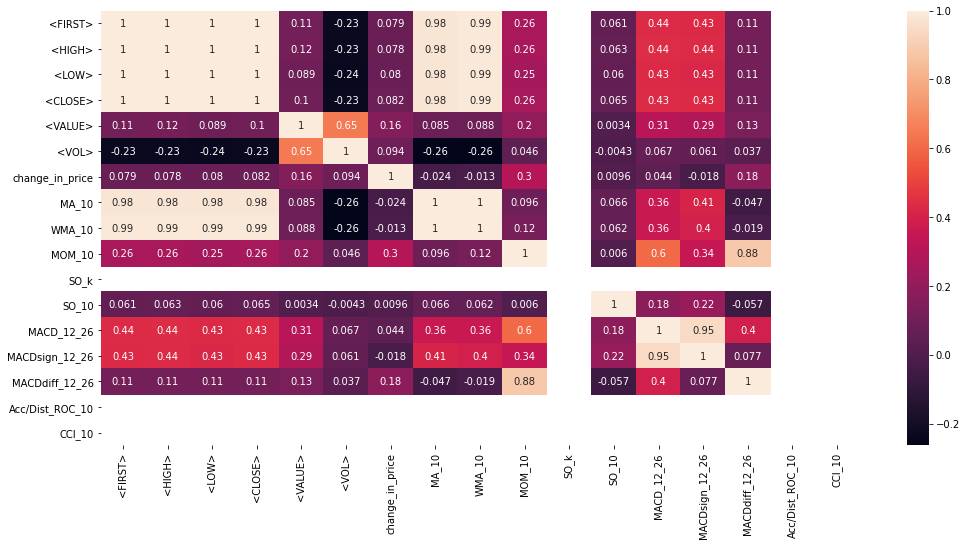

In [154]:
import seaborn as sns
plt.figure(1 , figsize = (17 , 8))
cor = sns.heatmap(data.corr(), annot = True)

In [155]:
#To check null values
data.isnull().sum()

<FIRST>               0
<HIGH>                0
<LOW>                 0
<CLOSE>               0
<VALUE>               0
<VOL>                 0
change_in_price       1
MA_10                 9
WMA_10                9
MOM_10               10
SO_k               1535
SO_10                18
MACD_12_26           25
MACDsign_12_26       33
MACDdiff_12_26       33
Acc/Dist_ROC_10    1535
CCI_10             1535
dtype: int64

In [156]:
#Removing the null values
data = data.fillna(data.mean())

In [157]:
data = data.dropna(how="all",axis=1)

In [158]:
##Defining the features and labels
X = data.iloc[:,7:]
X.tail()

,MA_10,WMA_10,MOM_10,SO_10,MACD_12_26,MACDsign_12_26,MACDdiff_12_26
datetime,,,,,,,
2020-05-26,0.654171,0.636378,-0.108171,0.039918,0.282535,0.430960,-0.188950
2020-05-27,0.632517,0.624074,-0.176150,0.027478,0.240601,0.401001,-0.224005
2020-05-30,0.620476,0.621492,-0.099426,0.022712,0.218296,0.371840,-0.218073
2020-05-31,0.616625,0.626720,-0.034045,0.018408,0.211368,0.346898,-0.186714
2020-06-01,0.620054,0.635028,0.024055,0.018408,0.210650,0.326777,-0.150875


In [159]:
Y = data.iloc[:,3]
Y.tail()

datetime
2020-05-26    0.537230
2020-05-27    0.498516
2020-05-30    0.534692
2020-05-31    0.570173
2020-06-01    0.589652
Name: <CLOSE>, dtype: float64

In [160]:
X.isnull().sum()

MA_10             0
WMA_10            0
MOM_10            0
SO_10             0
MACD_12_26        0
MACDsign_12_26    0
MACDdiff_12_26    0
dtype: int64

## Visualising the technical indicators i.e. our features

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f28d86cd748>,
      dtype=object)

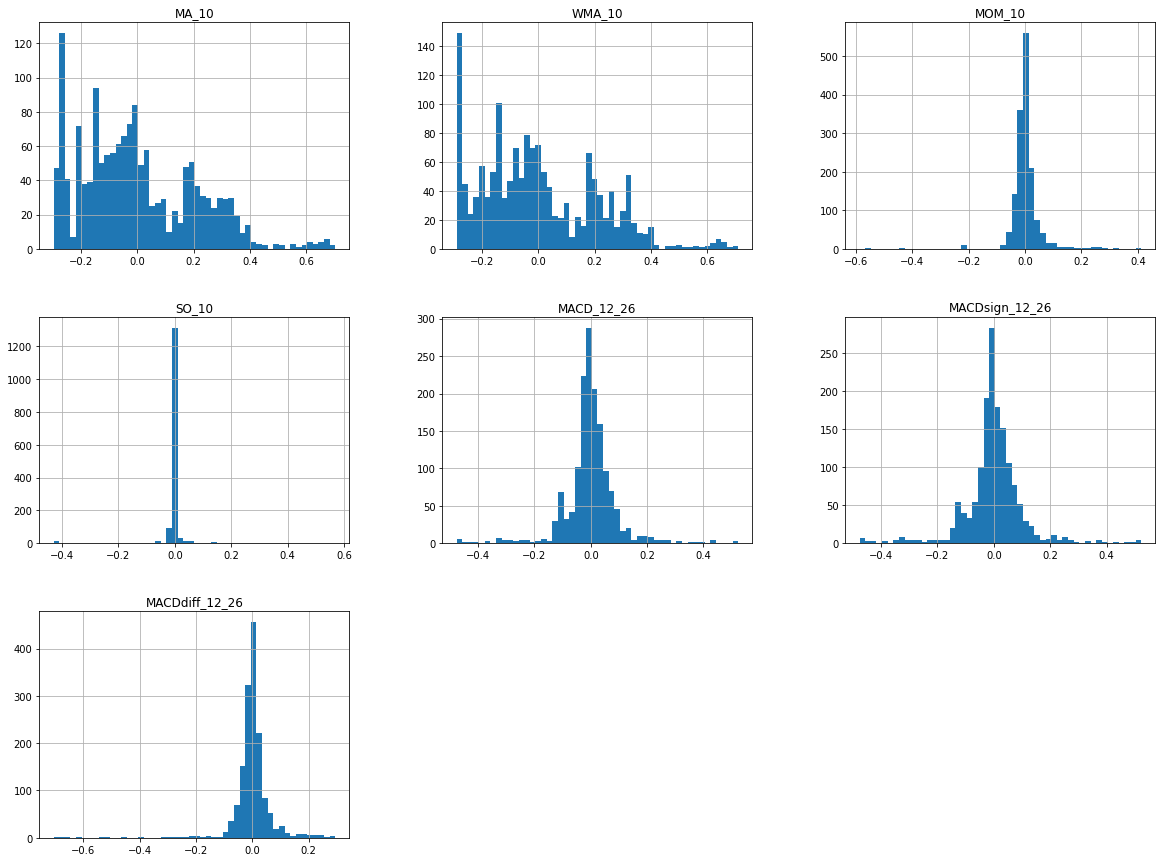

In [161]:
X.hist(bins=50,figsize=(20,15))

In [162]:
#Splitting data into training and test set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.1,random_state = 0)

# Predicting using Decision Trees

In [163]:
#Decision Tree
from sklearn.tree import DecisionTreeRegressor
Regressor = DecisionTreeRegressor(max_depth=10)
Regressor.fit(x_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=10,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

## Evaluating the Model

In [164]:
y_pred = Regressor.predict(x_test)
from sklearn.metrics import r2_score,mean_squared_error
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
rmse

0.024631886252631897

# Using Bagging Regressor

In [165]:
#import necessary libraries
from sklearn.ensemble import BaggingRegressor

In [166]:
regr = BaggingRegressor(base_estimator=Regressor,
n_estimators=50, random_state=0)
regr.fit(x_train,y_train)
    

BaggingRegressor(base_estimator=DecisionTreeRegressor(ccp_alpha=0.0,
                                                      criterion='mse',
                                                      max_depth=10,
                                                      max_features=None,
                                                      max_leaf_nodes=None,
                                                      min_impurity_decrease=0.0,
                                                      min_impurity_split=None,
                                                      min_samples_leaf=1,
                                                      min_samples_split=2,
                                                      min_weight_fraction_leaf=0.0,
                                                      presort='deprecated',
                                                      random_state=None,
                                                      splitter='best'),
                 bootstrap=Tru

## Evaluating Bagging Regressor

In [167]:
y_pred_br = regr.predict(x_test)

In [168]:
from sklearn.metrics import r2_score,mean_squared_error
mse = mean_squared_error(y_test,y_pred_br)
rmse = np.sqrt(mse)
rmse

0.025203987499292875

# Using Random Forest

In [169]:
#importing the libraries
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=50,max_depth=10,random_state=1)
rf.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=10, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=50, n_jobs=None, oob_score=False,
                      random_state=1, verbose=0, warm_start=False)

## Evaluating Random Forest

In [170]:
y_pred_rf = rf.predict(x_test)


In [171]:
from sklearn.metrics import r2_score,mean_squared_error
mse = mean_squared_error(y_test,y_pred_rf)
rmse = np.sqrt(mse)
rmse

0.024904988095471963

 ## Using AdaBoost Regressor

In [172]:
#importing necessary libraries
from sklearn.ensemble import AdaBoostRegressor
adb_reg = AdaBoostRegressor(base_estimator=Regressor,n_estimators=100,learning_rate=0.1)
adb_reg.fit(x_train,y_train)



AdaBoostRegressor(base_estimator=DecisionTreeRegressor(ccp_alpha=0.0,
                                                       criterion='mse',
                                                       max_depth=10,
                                                       max_features=None,
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                                                       presort='deprecated',
                                                       random_state=None,
                                                       splitter='best'),
                 

## Evaluating AdaBoost Regressor

In [173]:
y_pred_adb = adb_reg.predict(x_test)
from sklearn.metrics import r2_score,mean_squared_error
mse = mean_squared_error(y_test,y_pred_adb)
rmse = np.sqrt(mse)
rmse

0.025460734915021488

## Using Gradient Boosting

In [174]:
#importing necessary libraries
from sklearn.ensemble import GradientBoostingRegressor
gdbt = GradientBoostingRegressor(max_depth=10,learning_rate=0.1,n_estimators=50,random_state=1)
gdbt.fit(x_train,y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=10,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=50,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=1, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

## Evaluating gradient boosting

In [175]:
y_pred_gdbt = gdbt.predict(x_test)
from sklearn.metrics import r2_score,mean_squared_error
mse = mean_squared_error(y_test,y_pred_gdbt)
rmse = np.sqrt(mse)
rmse

0.024275878387442162

## Using XGBoost

In [176]:
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

##Using Deep Learning Models

In [177]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Training and testing set

In [178]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.1,random_state = 0)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(1381, 7) (154, 7) (1381,) (154,)


In [179]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
X_train_scaled = sc.fit_transform(x_train)

In [180]:
X_train, Y_train = np.array(x_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

## Using ANN

### Importing Libraries

In [181]:
import tensorflow as tf 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import keras 
from keras.models import Sequential 
from keras.layers import Dense 
from sklearn.metrics import confusion_matrix 

### Building the ANN Model


In [209]:
classifier = Sequential() 
classifier.add(Dense(units=50,activation = "relu",input_shape = (X_train.shape[1], 1))) 
classifier.add(Dense(units=50,activation = "relu")) 
classifier.add(Dense(activation = "sigmoid", units = 1)) 
classifier.compile(optimizer = 'adam' , loss = 'mean_squared_error' ) 

In [210]:
classifier.fit(X_train, Y_train, epochs = 15, batch_size = 32)

Epoch 1/15
44/44 [==============================] - 0s 2ms/step - loss: 0.2290
Epoch 2/15
44/44 [==============================] - 0s 2ms/step - loss: 0.0768
Epoch 3/15
44/44 [==============================] - 0s 2ms/step - loss: 0.0354
Epoch 4/15
44/44 [==============================] - 0s 2ms/step - loss: 0.0307
Epoch 5/15
44/44 [==============================] - 0s 2ms/step - loss: 0.0283
Epoch 6/15
44/44 [==============================] - 0s 1ms/step - loss: 0.0276
Epoch 7/15
44/44 [==============================] - 0s 2ms/step - loss: 0.0273
Epoch 8/15
44/44 [==============================] - 0s 1ms/step - loss: 0.0271
Epoch 9/15
44/44 [==============================] - 0s 1ms/step - loss: 0.0270
Epoch 10/15
44/44 [==============================] - 0s 1ms/step - loss: 0.0269
Epoch 11/15
44/44 [==============================] - 0s 1ms/step - loss: 0.0267
Epoch 12/15
44/44 [==============================] - 0s 1ms/step - loss: 0.0267
Epoch 13/15
44/44 [==============================

In [211]:
X_test = np.array(x_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1], 1))
predicted_stock_price = classifier.predict(X_test)

In [212]:
real_stock_price = np.asarray(y_test)
# real_stock_price=real_stock_price.reshape(1167,1)

In [213]:
predicted_stock_price

array([[[0.00629717],
        [0.00655535],
        [0.0198217 ],
        ...,
        [0.01497445],
        [0.01169312],
        [0.01933071]],

       [[0.00040558],
        [0.00038746],
        [0.01053974],
        ...,
        [0.00974298],
        [0.00944665],
        [0.01134592]],

       [[0.00187373],
        [0.00183234],
        [0.01010534],
        ...,
        [0.00844327],
        [0.00765139],
        [0.01280653]],

       ...,

       [[0.00452185],
        [0.00446105],
        [0.00885519],
        ...,
        [0.01504013],
        [0.01757216],
        [0.0091449 ]],

       [[0.32313797],
        [0.32806802],
        [0.01038629],
        ...,
        [0.00707841],
        [0.0064415 ],
        [0.01248378]],

       [[0.00220099],
        [0.00211614],
        [0.00982472],
        ...,
        [0.01032147],
        [0.01095656],
        [0.00975955]]], dtype=float32)

In [187]:
real_stock_price

array([-0.0097092 , -0.24550884, -0.12748625,  0.02118783, -0.14009061,
       -0.24837347, -0.16218915, -0.07706884, -0.21804936, -0.04216132,
        0.21450916, -0.12732256, -0.01928524,  0.15680741, -0.01065044,
       -0.14332354,  0.08727885, -0.13170135, -0.15813775, -0.03168498,
       -0.24718669, -0.18260984,  0.10303429,  0.04766516, -0.21387519,
        0.72879137, -0.2013936 , -0.01723908,  0.03727066,  0.24622467,
        0.02118783, -0.04862719, -0.24972393,  0.22441259,  0.26660443,
        0.19171493, -0.14455124, -0.25181102, -0.02689696, -0.17618489,
        0.23464339, -0.18666124,  0.08265452,  0.02049214, -0.14258692,
        0.46753748,  0.20554698, -0.24915101,  0.04410484,  0.14837723,
       -0.25246579, -0.0819387 , -0.17323842, -0.01711631,  0.15336986,
       -0.00958643, -0.1767169 , -0.01388337, -0.06323678,  0.07631142,
        0.01746382,  0.03350573, -0.15007587,  0.26660443, -0.24800516,
       -0.12167515, -0.21784474, -0.0438801 , -0.07240359,  0.02

In [225]:
""" plt.figure(figsize=(20,10))
plt.plot(real_stock_price, color = 'green', label = 'Stock Price')
plt.plot(predicted_stock_price, color = 'red', label = 'Predicted Stock Price')
plt.title('Stock Price Prediction Using ANN')
plt.xlabel('Trading Day')
plt.ylabel('Stock Price')
plt.legend()
plt.show() """ #error

" plt.figure(figsize=(20,10))\nplt.plot(real_stock_price, color = 'green', label = 'Stock Price')\nplt.plot(predicted_stock_price, color = 'red', label = 'Predicted Stock Price')\nplt.title('Stock Price Prediction Using ANN')\nplt.xlabel('Trading Day')\nplt.ylabel('Stock Price')\nplt.legend()\nplt.show() "

## Using LSTM

### Importing libraries

In [215]:
pip install nsepy

In [216]:
from nsepy import get_history as gh
import datetime as dt
from matplotlib import pyplot as plt
from sklearn import model_selection
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

### Building the LSTM

In [217]:
regressor = Sequential()
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))
regressor.add(Dense(units = 1))

### Compiling and training the model defined in the above step.
(Iteratively, we can increase or decrease the epochs and batch size to get more accuracy.)

In [218]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')
regressor.fit(X_train, Y_train, epochs = 15, batch_size = 32)

Epoch 1/15
44/44 [==============================] - 1s 17ms/step - loss: 0.0132
Epoch 2/15
44/44 [==============================] - 1s 17ms/step - loss: 0.0014
Epoch 3/15
44/44 [==============================] - 1s 16ms/step - loss: 0.0016
Epoch 4/15
44/44 [==============================] - 1s 16ms/step - loss: 0.0014
Epoch 5/15
44/44 [==============================] - 1s 17ms/step - loss: 0.0014
Epoch 6/15
44/44 [==============================] - 1s 16ms/step - loss: 0.0013
Epoch 7/15
44/44 [==============================] - 1s 16ms/step - loss: 0.0013
Epoch 8/15
44/44 [==============================] - 1s 17ms/step - loss: 0.0013
Epoch 9/15
44/44 [==============================] - 1s 16ms/step - loss: 0.0014
Epoch 10/15
44/44 [==============================] - 1s 16ms/step - loss: 0.0013
Epoch 11/15
44/44 [==============================] - 1s 17ms/step - loss: 0.0015
Epoch 12/15
44/44 [==============================] - 1s 16ms/step - loss: 0.0013
Epoch 13/15
44/44 [==================

In [219]:
X_test = np.array(x_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)

In [220]:
real_stock_price = np.asarray(y_test)
# real_stock_price=real_stock_price.reshape(1167,1)

In [221]:
predicted_stock_price

array([[-1.78811587e-02],
       [-2.27249086e-01],
       [-1.19245403e-01],
       [-6.24104775e-02],
       [-1.20400697e-01],
       [-2.28339821e-01],
       [-1.58334076e-01],
       [-6.96533024e-02],
       [-2.03469634e-01],
       [-3.84858996e-02],
       [ 2.53620706e-02],
       [-1.18442476e-01],
       [-1.47226779e-02],
       [ 1.31764010e-01],
       [-7.47638615e-03],
       [-1.31911695e-01],
       [ 7.72431642e-02],
       [-9.87963304e-02],
       [-1.47522375e-01],
       [-2.87267417e-02],
       [-2.27941260e-01],
       [-1.63518533e-01],
       [ 8.16238485e-03],
       [ 8.53215456e-02],
       [-2.02061579e-01],
       [ 6.22966588e-01],
       [-1.93503350e-01],
       [-7.89343100e-03],
       [ 9.94866062e-03],
       [ 2.26549700e-01],
       [-4.25624736e-02],
       [-3.44688632e-02],
       [-2.30480745e-01],
       [ 2.24172369e-01],
       [ 2.48734206e-01],
       [ 1.82287470e-01],
       [-1.31255731e-01],
       [-2.37603202e-01],
       [-7.3

In [222]:
real_stock_price

array([-0.0097092 , -0.24550884, -0.12748625,  0.02118783, -0.14009061,
       -0.24837347, -0.16218915, -0.07706884, -0.21804936, -0.04216132,
        0.21450916, -0.12732256, -0.01928524,  0.15680741, -0.01065044,
       -0.14332354,  0.08727885, -0.13170135, -0.15813775, -0.03168498,
       -0.24718669, -0.18260984,  0.10303429,  0.04766516, -0.21387519,
        0.72879137, -0.2013936 , -0.01723908,  0.03727066,  0.24622467,
        0.02118783, -0.04862719, -0.24972393,  0.22441259,  0.26660443,
        0.19171493, -0.14455124, -0.25181102, -0.02689696, -0.17618489,
        0.23464339, -0.18666124,  0.08265452,  0.02049214, -0.14258692,
        0.46753748,  0.20554698, -0.24915101,  0.04410484,  0.14837723,
       -0.25246579, -0.0819387 , -0.17323842, -0.01711631,  0.15336986,
       -0.00958643, -0.1767169 , -0.01388337, -0.06323678,  0.07631142,
        0.01746382,  0.03350573, -0.15007587,  0.26660443, -0.24800516,
       -0.12167515, -0.21784474, -0.0438801 , -0.07240359,  0.02

### Plotting the results

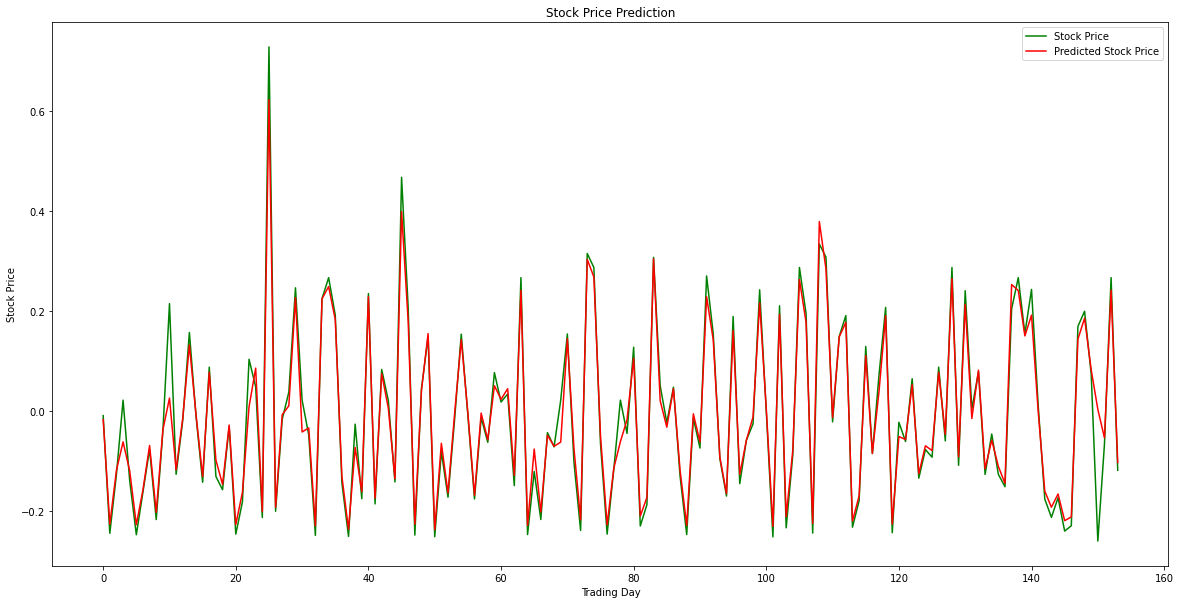

In [223]:
plt.figure(figsize=(20,10))
plt.plot(real_stock_price, color = 'green', label = 'Stock Price')
plt.plot(predicted_stock_price, color = 'red', label = 'Predicted Stock Price')
plt.title('Stock Price Prediction')
plt.xlabel('Trading Day')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [224]:
from sklearn.metrics import mean_squared_error as MSE
rmse = MSE(real_stock_price,predicted_stock_price)**(1/2)
rmse

0.03644112273852919